# 
### Project Name:   Forecasting Future HUL Stock Price with Time Series Analysis\SBI Stock Forecasting using Time Series Analysis Models


In [ ]:
!pip install yfinance
!pip install ta

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import ta
import pandas as pd
from datetime import date, timedelta, datetime
from IPython.display import clear_output
import numpy as np
from sklearn.metrics import mean_squared_error as mse
%matplotlib inline

In [ ]:
ticker = 'HINDUNILVR.NS'
start_date = '2012-11-01'
end_date = '2022-10-31'

date_fmt = '%Y-%m-%d'

In [ ]:
df = yf.download(ticker, start_date, end_date)
df.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-21,2606.000000,2666.750000,2606.0,2653.899902,2636.212158,2458302
2022-10-24,2610.100098,2640.000000,2550.0,2573.100098,2555.950928,719908
2022-10-25,2586.000000,2586.000000,2500.0,2505.399902,2488.701904,2923789
2022-10-27,2494.000000,2530.000000,2488.0,2519.000000,2502.211426,1846329
2022-10-28,2526.100098,2550.899902,2512.0,2524.250000,2507.426270,1164951


In [ ]:
df['High']

Date
2012-11-01     540.599976
2012-11-02     541.450012
2012-11-05     537.250000
2012-11-06     535.000000
2012-11-07     536.299988
                 ...     
2022-10-21    2666.750000
2022-10-24    2640.000000
2022-10-25    2586.000000
2022-10-27    2530.000000
2022-10-28    2550.899902
Name: High, Length: 2463, dtype: float64

In [ ]:
#df['Date'] = pd.to_datetime(df.Date,dayfirst=True)

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-11-01,537.400024,540.599976,531.000000,537.450012,451.880615,1843023
2012-11-02,541.450012,541.450012,532.200012,533.000000,448.139099,2005259
2012-11-05,536.400024,537.250000,530.349976,533.000000,448.139099,1500512
2012-11-06,530.500000,535.000000,526.599976,532.849976,448.012878,1590975
2012-11-07,532.099976,536.299988,527.099976,534.549988,449.442291,1835616
...,...,...,...,...,...,...
2022-10-21,2606.000000,2666.750000,2606.000000,2653.899902,2636.212158,2458302
2022-10-24,2610.100098,2640.000000,2550.000000,2573.100098,2555.950928,719908
2022-10-25,2586.000000,2586.000000,2500.000000,2505.399902,2488.701904,2923789


In [ ]:
#data = df.drop(['Date'], axis=1)
#data.index = df.Date

In [ ]:
df.rename(columns = {'Date':'Date', 
                     'Open':'Open',
                     'High':'High',
                     'Low':'Low',
                     'Close':'Close',
                     'Adj Close':'Adj_Close',
                     'Volume':'Volume'}, inplace = True)
df

,Open,High,Low,Close,Adj_Close,Volume
Date,,,,,,
2012-11-01,537.400024,540.599976,531.000000,537.450012,451.880615,1843023
2012-11-02,541.450012,541.450012,532.200012,533.000000,448.139099,2005259
2012-11-05,536.400024,537.250000,530.349976,533.000000,448.139099,1500512
2012-11-06,530.500000,535.000000,526.599976,532.849976,448.012878,1590975
2012-11-07,532.099976,536.299988,527.099976,534.549988,449.442291,1835616
...,...,...,...,...,...,...
2022-10-21,2606.000000,2666.750000,2606.000000,2653.899902,2636.212158,2458302
2022-10-24,2610.100098,2640.000000,2550.000000,2573.100098,2555.950928,719908
2022-10-25,2586.000000,2586.000000,2500.000000,2505.399902,2488.701904,2923789


#EDA

In [ ]:
df['Adj_Close'].plot()

In [ ]:
df.shape

(2463, 7)

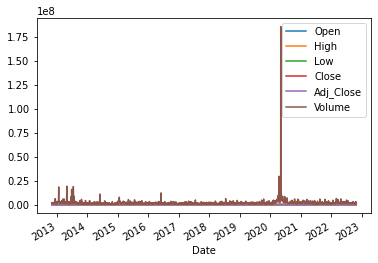

In [ ]:
df.set_index('Date',inplace=True)
df.index=pd.to_datetime(df.index)
#drop null values
df.dropna(inplace=True)
df.plot()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
result=seasonal_decompose(df['Adj_Close'], model='multiplicable', period=12)

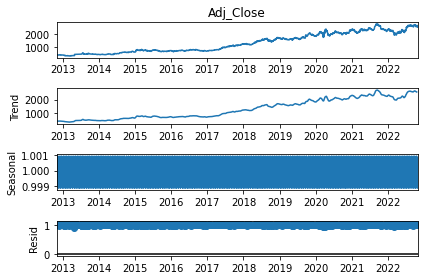

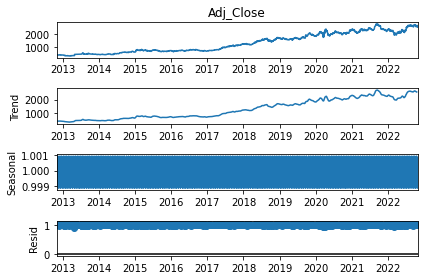

In [ ]:
result.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller
print("Observations of Dickey-fuller test")
dftest = adfuller(df['Adj_Close'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dftest[4].items():
    dfoutput['critical value (%s)'%key]= value
print(dfoutput)

Observations of Dickey-fuller test
Test Statistic                   -0.037437
p-value                           0.955324
#lags used                       24.000000
number of observations used    2438.000000
critical value (1%)              -3.433035
critical value (5%)              -2.862726
critical value (10%)             -2.567401
dtype: float64


In [ ]:
df['diff_1'] = df['Adj_Close'].diff(periods=3)

In [ ]:
df=df.dropna()

In [ ]:
print("Observations of Dickey-fuller test")
dftest = adfuller(df['diff_1'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dftest[4].items():
    dfoutput['critical value (%s)'%key]= value
print(dfoutput)

Observations of Dickey-fuller test
Test Statistic                -9.425248e+00
p-value                        5.368388e-16
#lags used                     2.700000e+01
number of observations used    2.432000e+03
critical value (1%)           -3.433042e+00
critical value (5%)           -2.862729e+00
critical value (10%)          -2.567403e+00
dtype: float64


In [ ]:
data=df

In [ ]:
train_df = data.iloc[:int(df.shape[0]*0.9595), :]
valid_df = data.iloc[int(df.shape[0]*0.9595):, :]

In [ ]:
train_df.shape, valid_df.shape

((2363, 6), (100, 6))

In [ ]:
df.shape

(2463, 6)

### Auto Regressive (AR) model

In [ ]:
train_df

,Open,High,Low,Close,Adj_Close,Volume
Date,,,,,,
2012-11-01,537.400024,540.599976,531.000000,537.450012,451.880615,1843023
2012-11-02,541.450012,541.450012,532.200012,533.000000,448.139099,2005259
2012-11-05,536.400024,537.250000,530.349976,533.000000,448.139099,1500512
2012-11-06,530.500000,535.000000,526.599976,532.849976,448.012878,1590975
2012-11-07,532.099976,536.299988,527.099976,534.549988,449.442291,1835616
...,...,...,...,...,...,...
2022-05-30,2342.199951,2365.000000,2331.000000,2348.949951,2292.402100,939562
2022-05-31,2360.000000,2367.899902,2303.899902,2353.250000,2296.598389,3123979
2022-06-01,2370.000000,2413.800049,2302.000000,2308.449951,2252.876953,2197599


In [ ]:
len(valid_df), len(train_df)

(100, 2363)

In [ ]:
len(valid_df), len(train_df)

(100, 2363)

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

# fit model
model = AutoReg(train_df['Adj_Close'], lags=1)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(2363, 2462)
print(yhat)

2363    2237.126412
2364    2237.478508
2365    2237.830457
2366    2238.182260
2367    2238.533917
           ...     
2458    2269.930651
2459    2270.269117
2460    2270.607443
2461    2270.945628
2462    2271.283672
Length: 100, dtype: float64


C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [ ]:
yhat.index = valid_df.index

In [ ]:
rmse= np.sqrt(mse(yhat, valid_df['Adj_Close']))
print("RMSE: ",rmse)

RMSE:  289.9988170097882


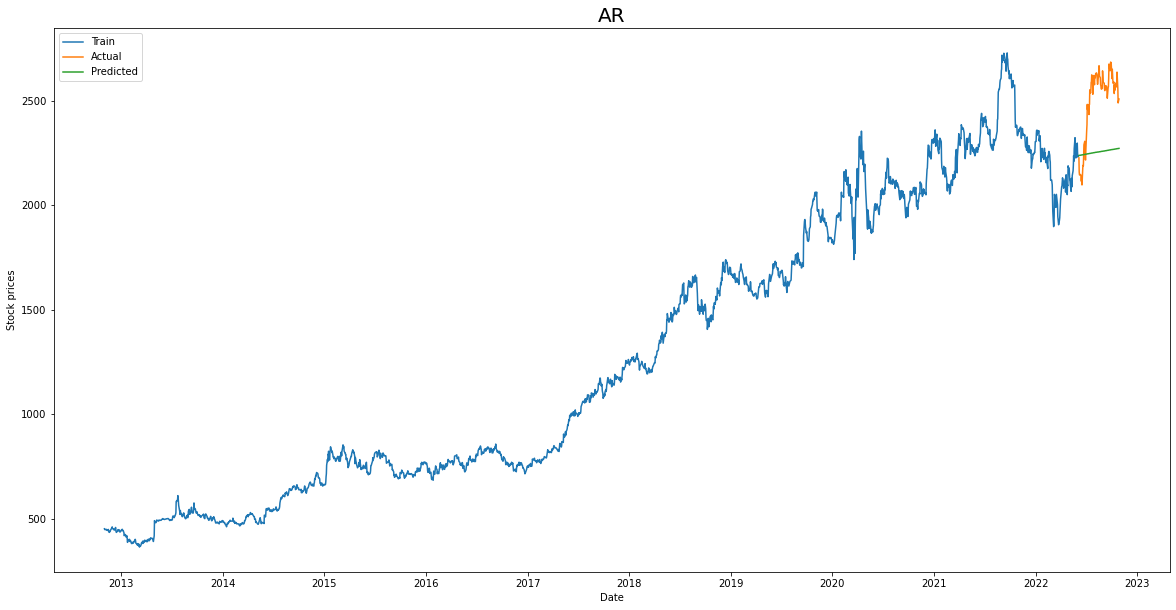

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(train_df['Adj_Close'], label='Train')
plt.plot(valid_df['Adj_Close'], label='Actual')
plt.plot(yhat, label='Predicted')
plt.xlabel("Date")
plt.ylabel("Stock prices")
plt.title('AR', fontsize = 20)
plt.legend()
plt.show()

### Moving Average (MA)

In [ ]:
# MA example
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(train_df['Adj_Close'], order=(0,0,1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(2363, 2462)
print(yhat)

# model = AutoReg(train_df['Close'], lags=1)
# model_fit = model.fit()
# # make prediction
# yhat = model_fit.predict(982, 1227)
# print(yhat)

C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


2363    1253.481221
2364    1266.128249
2365    1266.128249
2366    1266.128249
2367    1266.128249
           ...     
2458    1266.128249
2459    1266.128249
2460    1266.128249
2461    1266.128249
2462    1266.128249
Name: predicted_mean, Length: 100, dtype: float64


C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
yhat.index = valid_df.index

rmse= np.sqrt(mse(yhat, valid_df['Adj_Close']))
print("RMSE: ",rmse)

RMSE:  1242.284689648154


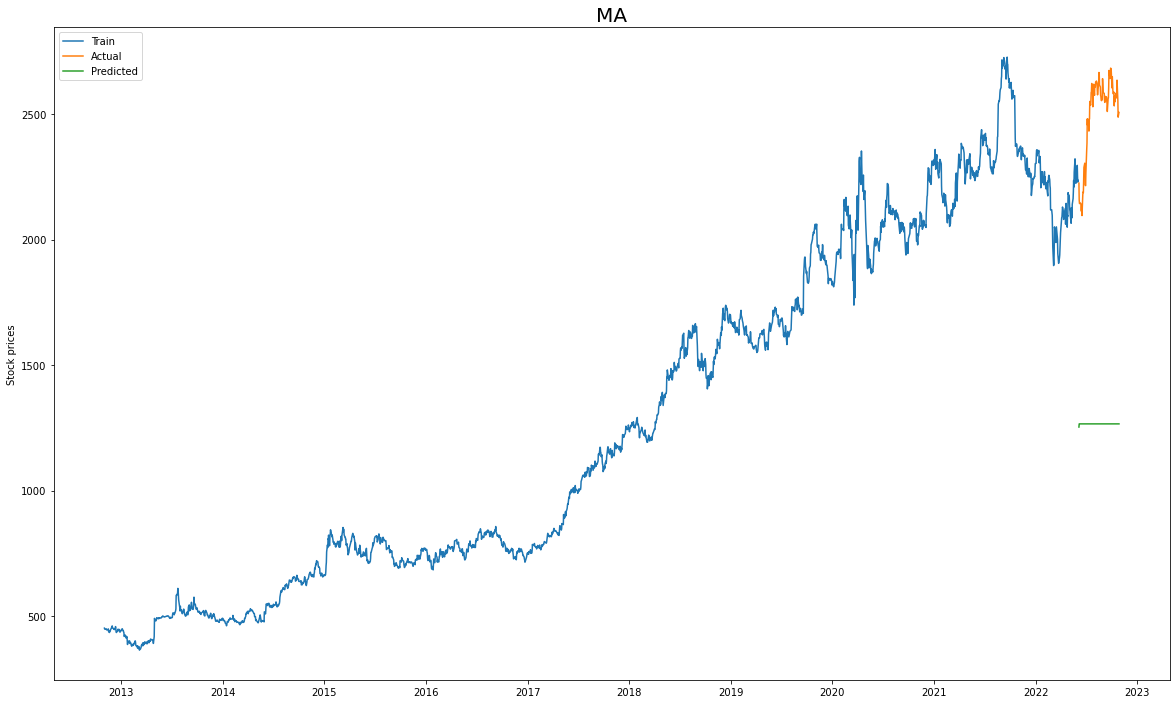

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(train_df['Adj_Close'], label='Train')
plt.plot(valid_df['Adj_Close'], label='Actual')
plt.plot(yhat, label='Predicted')
plt.ylabel("Stock prices")
plt.title('MA', fontsize = 20)
plt.legend()
plt.show()

## Autoregressive Integrated Moving Average (ARIMA) will be used from after v_0.12

#### Autoregressive Moving Average (ARMA) has been Depricated!

Note: statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

Note: statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.

### ARIMA(0, 1, 2)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(train_df['Adj_Close'], order=(0, 1, 2))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(2363, 2462)
#print(yhat)

yhat.index = valid_df.index
np.sqrt(mse(yhat, valid_df['Close']))

C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


322.27100773201306

### ARIMA(0, 2, 1)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(train_df['Adj_Close'], order=(0, 2, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(2363, 2462)
print(yhat)

C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


2363    2237.528924
2364    2238.283678
2365    2239.038432
2366    2239.793186
2367    2240.547940
           ...     
2458    2309.230547
2459    2309.985301
2460    2310.740055
2461    2311.494809
2462    2312.249563
Name: predicted_mean, Length: 100, dtype: float64


C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
yhat.index = valid_df.index

np.sqrt(mse(yhat, valid_df['Adj_Close']))

268.4225395906145

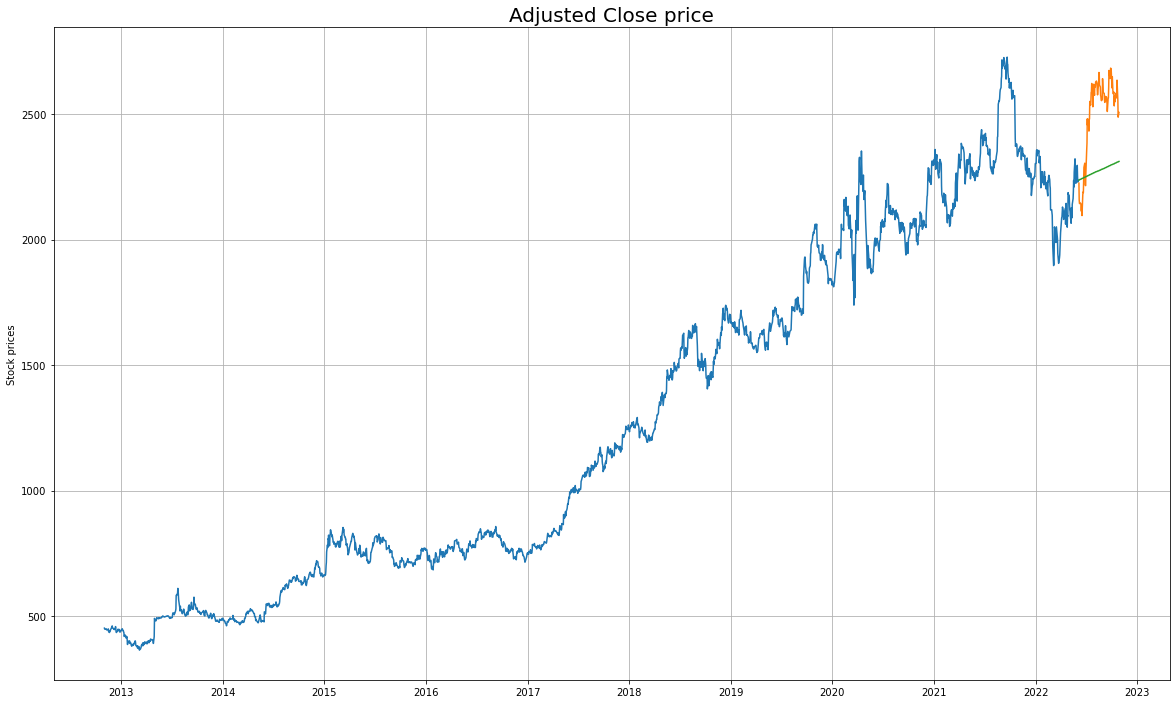

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(train_df['Adj_Close'], label='Train')
plt.plot(valid_df['Adj_Close'], label='Actual')
plt.plot(yhat, label='Predicted')
plt.ylabel("Stock prices")
plt.title('Adjusted Close price', fontsize = 20)
plt.grid()

### ARIMA(0, 2, 2)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(train_df['Adj_Close'], order=(0, 2, 2))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(2363, 2462)
#print(yhat)



C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
yhat.index = valid_df.index
np.sqrt(mse(yhat, valid_df['Adj_Close']))

268.5932157122994

### ARIMA(3, 1, 0)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(train_df['Adj_Close'], order=(3, 1, 0))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(2363, 2462)
#print(yhat)



C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
yhat.index = valid_df.index
np.sqrt(mse(yhat, valid_df['Adj_Close']))

309.9360417387805

### ARIMA(0, 3, 2)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(train_df['Adj_Close'], order=(0, 3, 2))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(2363, 2462)
#print(yhat)


C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\User

In [ ]:

yhat.index = valid_df.index
rmse= np.sqrt(mse(yhat, valid_df['Adj_Close']))
print("RMSE: ",rmse)

RMSE:  355.1291799183367


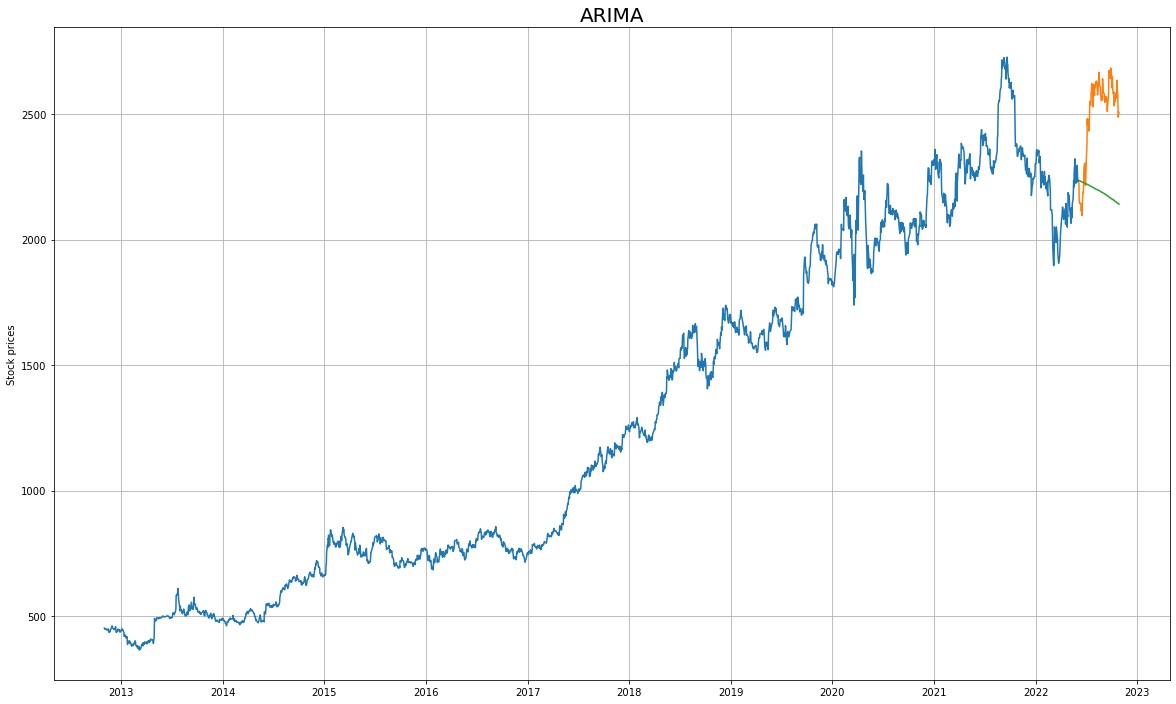

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(train_df['Adj_Close'], label='Train')
plt.plot(valid_df['Adj_Close'], label='Actual')
plt.plot(yhat, label='Predicted')
plt.ylabel("Stock prices")
plt.title('ARIMA', fontsize = 20)
plt.grid()

### ARIMA(0, 3, 3)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(train_df['Adj_Close'], order=(0, 3, 3))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(2363, 2462)
#print(yhat)


C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\User

In [ ]:
yhat.index = valid_df.index
np.sqrt(mse(yhat, valid_df['Adj_Close']))

359.7705159564771

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(train_df['Adj_Close'], order=(1,1,0))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(2363, 2462)
#print(yhat)



C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
yhat.index = valid_df.index
np.sqrt(mse(yhat, valid_df['Adj_Close']))

308.916293827121

### ARIMA(1,1,1)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(train_df['Adj_Close'], order=(1, 1, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(2363, 2462, typ='levels')
print(yhat)

C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


2363    2236.985019
2364    2237.036089
2365    2237.048459
2366    2237.051455
2367    2237.052180
           ...     
2458    2237.052412
2459    2237.052412
2460    2237.052412
2461    2237.052412
2462    2237.052412
Name: predicted_mean, Length: 100, dtype: float64


C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
yhat.index = valid_df.index
np.sqrt(mse(yhat, valid_df['Adj_Close']))

308.3994427974206

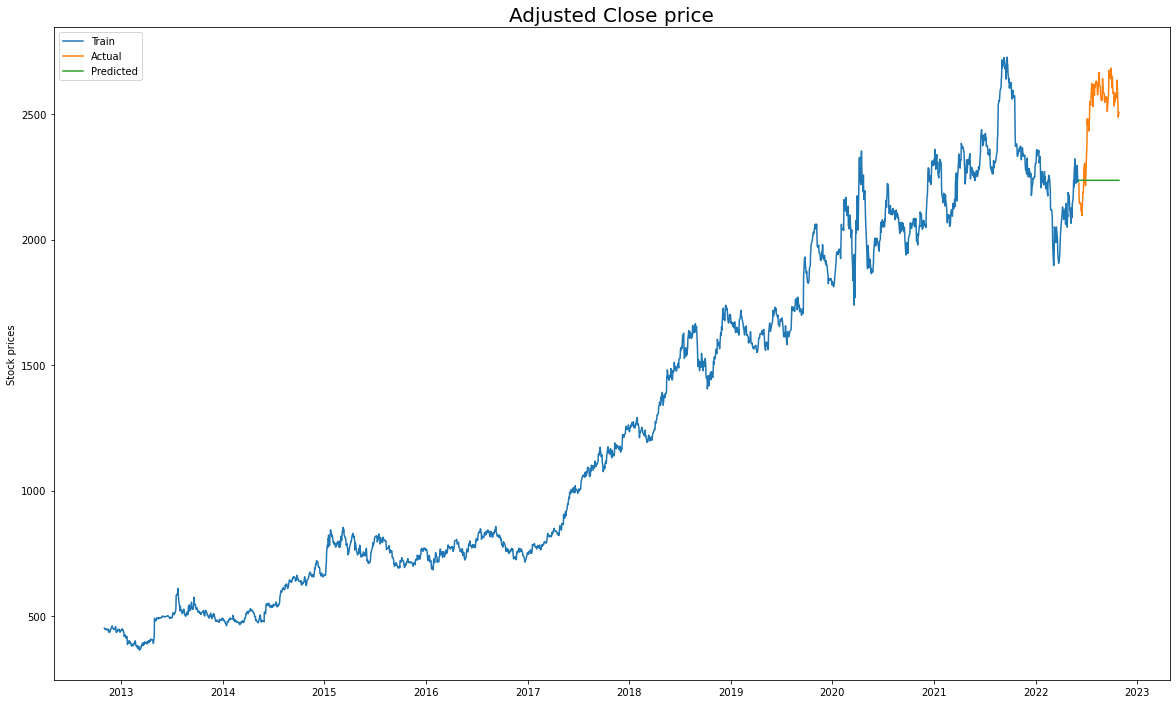

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(train_df['Adj_Close'], label='Train')
plt.plot(valid_df['Adj_Close'], label='Actual')
plt.plot(yhat, label='Predicted')
plt.ylabel("Stock prices")
plt.title('Adjusted Close price', fontsize = 20)
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(train_df['Adj_Close'], order=(0, 3, 3))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(2363, 2462)
#print(yhat)



C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\User

In [ ]:
yhat.index = valid_df.index
np.sqrt(mse(yhat, valid_df['Adj_Close']))

359.7705159564771

### ARIMA(2,1,1)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(train_df['Adj_Close'], order=(2, 1, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(2363, 2462, typ='levels')
print(yhat)

C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


2363    2235.873382
2364    2235.904306
2365    2235.956646
2366    2235.919608
2367    2235.939823
           ...     
2458    2235.932940
2459    2235.932940
2460    2235.932940
2461    2235.932940
2462    2235.932940
Name: predicted_mean, Length: 100, dtype: float64


C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
yhat.index = valid_df.index

np.sqrt(mse(yhat, valid_df['Adj_Close']))

309.3444867296717

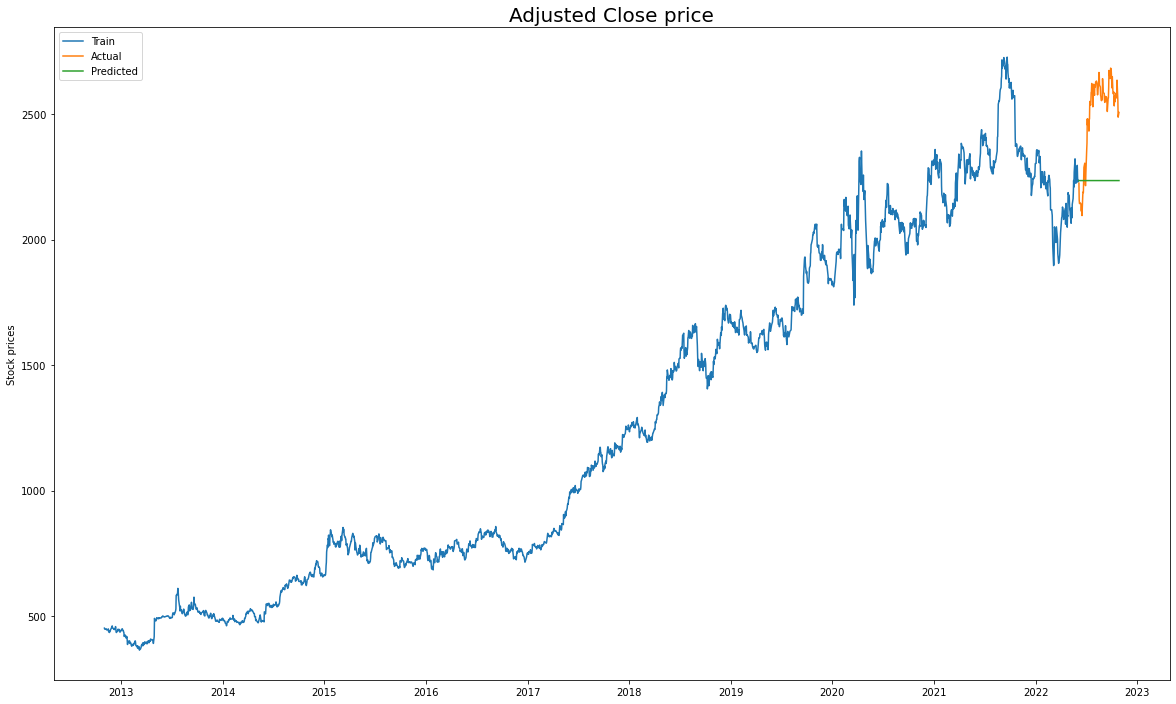

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(train_df['Adj_Close'], label='Train')
plt.plot(valid_df['Adj_Close'], label='Actual')
plt.plot(yhat, label='Predicted')
plt.ylabel("Stock prices")
plt.title('Adjusted Close price', fontsize = 20)
plt.legend()
plt.show()

### ARIMA(2,1,2)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(train_df['Adj_Close'], order=(2, 1, 2))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(2363, 2462, typ='levels')
#print(yhat)


C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
yhat.index = valid_df.index
np.sqrt(mse(yhat, valid_df['Adj_Close']))

309.87218935893543

### ARIMA(3,1,1)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(train_df['Adj_Close'], order=(3, 1, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(2363, 2462, typ='levels')
#print(yhat)



C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
yhat.index = valid_df.index
np.sqrt(mse(yhat, valid_df['Adj_Close']))

313.20895317160637

### ARIMA(3,1,2)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(train_df['Adj_Close'], order=(3, 1, 2))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(2363, 2462, typ='levels')
#print(yhat)


C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:

yhat.index = valid_df.index
np.sqrt(mse(yhat, valid_df['Adj_Close']))

313.5585440648345

### ARIMA(3,1,3)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(train_df['Adj_Close'], order=(3, 1, 3))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(2363, 2462, typ='levels')
#print(yhat)


C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sayan\a

In [ ]:

yhat.index = valid_df.index
np.sqrt(mse(yhat, valid_df['Adj_Close']))

311.67365959910995

In [ ]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pmdarima as pda

In [ ]:
from pmdarima.arima import auto_arima

model_auto = auto_arima(train_df['Adj_Close'],exog=train_df['Open'],
                        m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5)
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 2363
Model:             SARIMAX(2, 1, 2)x(1, 0, [], 5)   Log Likelihood              -10647.327
Date:                            Tue, 06 Dec 2022   AIC                          21308.654
Time:                                    11:31:16   BIC                          21349.025
Sample:                                         0   HQIC                         21323.353
                                           - 2363                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.3802      0.874      1.580      0.114      -0.332       3.093
ar.L1         -0.2276      0.039     -5.802      0.000      -0.305      -0.151
ar.L2         -0.7378      0.045    -16.479      0.000      -0.826      -0.650
ma.L1          0.1730      0.043      3.989      0.000       0.088       0.258
ma.L2          0.6552      0.050     13.072      0.000       0.557       0.753
ar.S.L5        0.0684      0.013      5.463      0.000       0.044       0.093
sigma2       481.8326      5.566     86.565      0.000     470.923     492.742
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             30129.58
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):              11.54   Skew:                             1.23
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Seasonal Autoregressive Integrated Moving-Average (SARIMA)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# fit model
model = SARIMAX(train_df['Adj_Close'], order=(2, 1, 2), seasonal_order=(1, 0, 1, 5))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(2364, 2463)
print(yhat)

C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


2364    2237.148575
2365    2236.148246
2366    2234.022184
2367    2238.047049
2368    2239.216735
           ...     
2459    2246.427953
2460    2246.407228
2461    2246.378055
2462    2246.434409
2463    2246.450080
Name: predicted_mean, Length: 100, dtype: float64


In [ ]:
yhat.index = valid_df.index

rmse= np.sqrt(mse(yhat, valid_df['Adj_Close']))
print("RMSE: ",rmse)

RMSE:  301.0134662562823


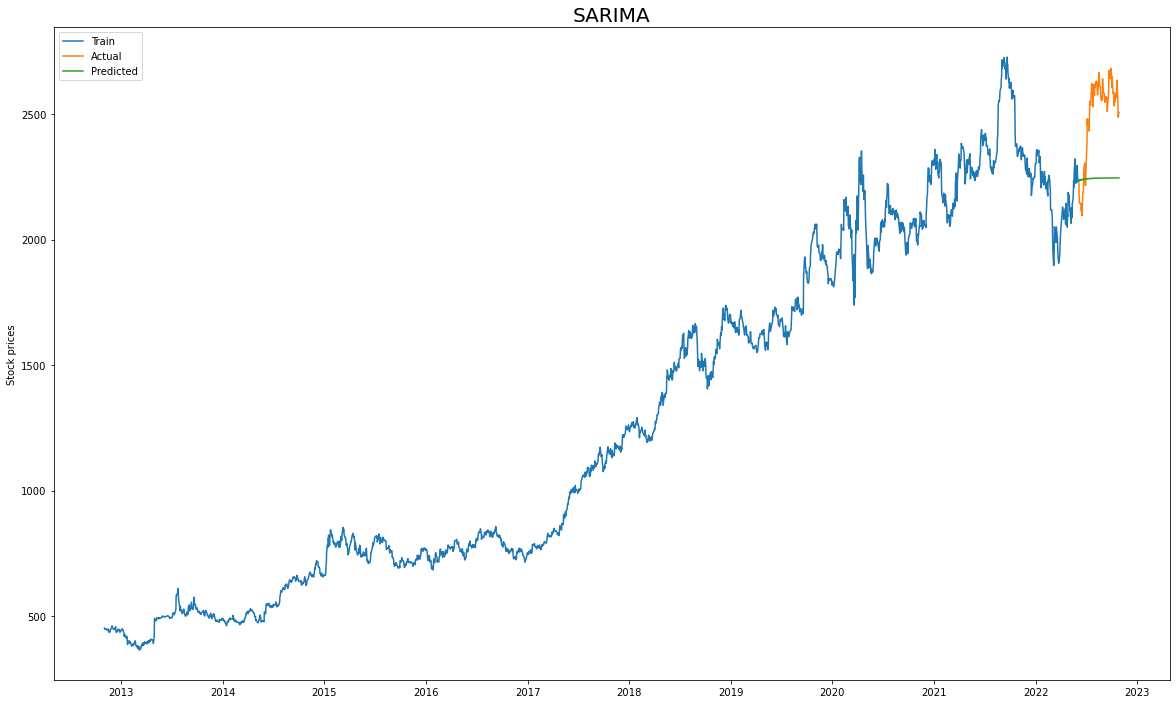

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(train_df['Adj_Close'], label='Train')
plt.plot(valid_df['Adj_Close'], label='Actual')
plt.plot(yhat, label='Predicted')
plt.ylabel("Stock prices")
plt.title('SARIMA', fontsize = 20)
plt.legend()
plt.show()

### Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# fit model
model = SARIMAX(train_df['Adj_Close'], exog=train_df['Open'], order=(2, 1, 2), seasonal_order=(1, 0, 1, 5))
model_fit = model.fit(disp=False)
# make prediction


C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:

yhat = model_fit.predict(2363, 2462, exog = valid_df['Open'])
print(yhat)

2363    2217.062013
2364    2198.674618
2365    2176.295311
2366    2160.774327
2367    2133.108448
           ...     
2458    2475.507182
2459    2478.669126
2460    2460.083432
2461    2389.134183
2462    2413.889377
Name: predicted_mean, Length: 100, dtype: float64


C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
yhat.index = valid_df.index


rmse= np.sqrt(mse(yhat, valid_df['Adj_Close']))
print("RMSE: ",rmse)

RMSE:  103.65129586894555


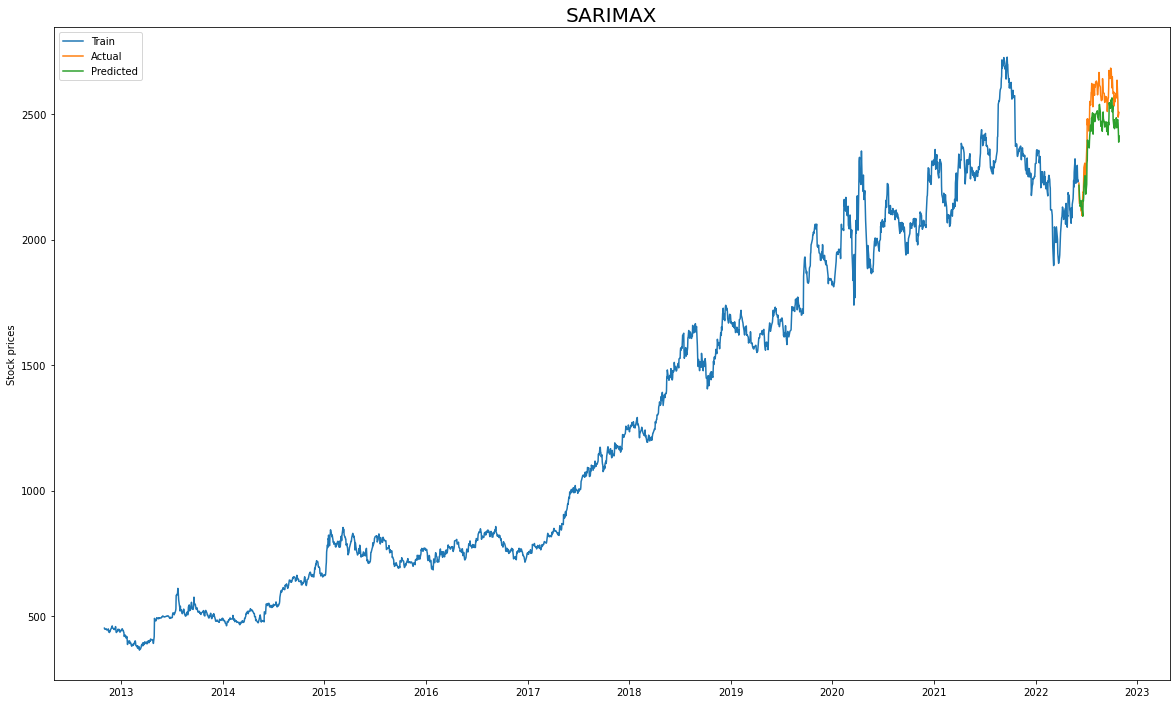

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(train_df['Adj_Close'], label='Train')
plt.plot(valid_df['Adj_Close'], label='Actual')
plt.plot(yhat, label='Predicted')
plt.ylabel("Stock prices")
plt.title('SARIMAX', fontsize = 20)
plt.legend()
plt.show()

### Simple Exponential Smoothing (SES)

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(train_df['Adj_Close'])
model_fit = model.fit()



C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# make prediction
yhat = model_fit.predict(2363, 2462)
print(yhat)

2363    2236.460621
2364    2236.460621
2365    2236.460621
2366    2236.460621
2367    2236.460621
           ...     
2458    2236.460621
2459    2236.460621
2460    2236.460621
2461    2236.460621
2462    2236.460621
Length: 100, dtype: float64


C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
yhat.index = valid_df.index

rmse= np.sqrt(mse(yhat, valid_df['Adj_Close']))
print("RMSE: ",rmse)

RMSE:  308.8989435397426


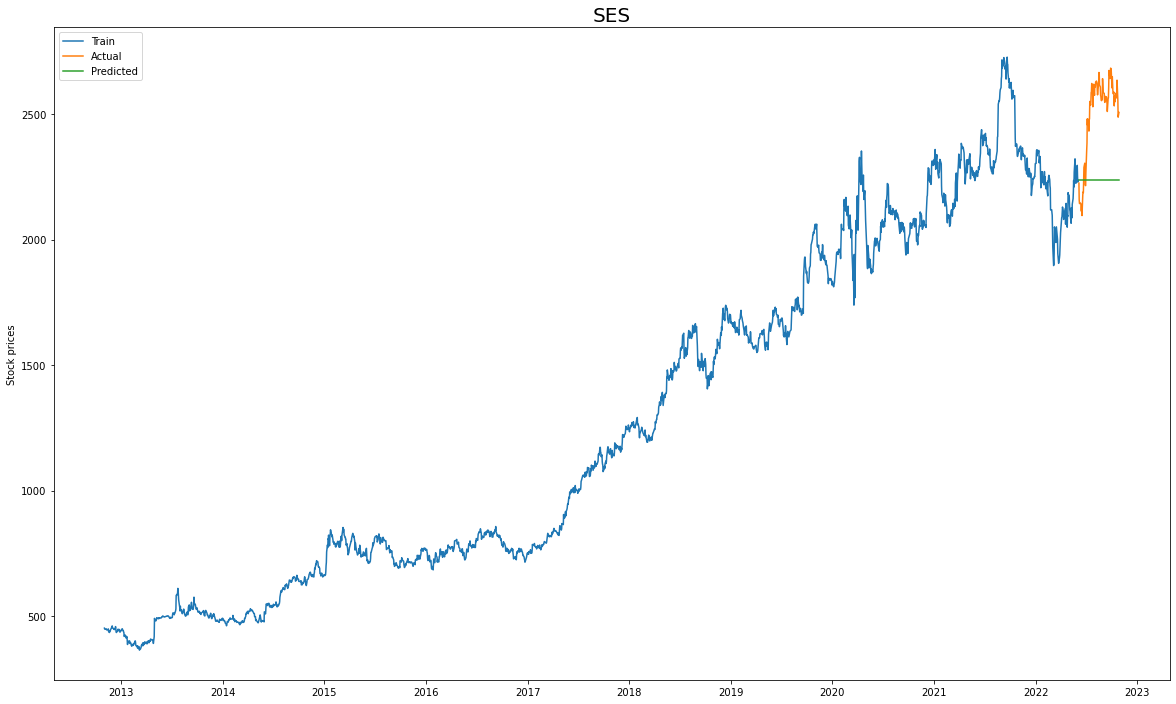

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(train_df['Adj_Close'], label='Train')
plt.plot(valid_df['Adj_Close'], label='Actual')
plt.plot(yhat, label='Predicted')
plt.ylabel("Stock prices")
plt.title('SES', fontsize = 20)
plt.legend()
plt.show()